### Open the dataset.

In [2]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [3]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [4]:
data_numerical.describe().reset_index()

,index,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
1,mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
2,std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
3,min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


### Baseline model

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

model_baseline = make_pipeline(StandardScaler(), SimpleImputer(), LinearRegression())

cv_result = cross_validate(model_baseline, data_numerical, target, cv=10, return_estimator=True)
cv_result

{'fit_time': array([1.72754288, 0.10228324, 0.0466454 , 0.02994227, 0.03013158,
        0.13690615, 0.03058457, 0.17375755, 0.11957955, 0.1789515 ]),
 'score_time': array([0.00940967, 0.0131588 , 0.00855708, 0.00945234, 0.00834441,
        0.00922441, 0.01055455, 0.00991106, 0.0195446 , 0.01799393]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

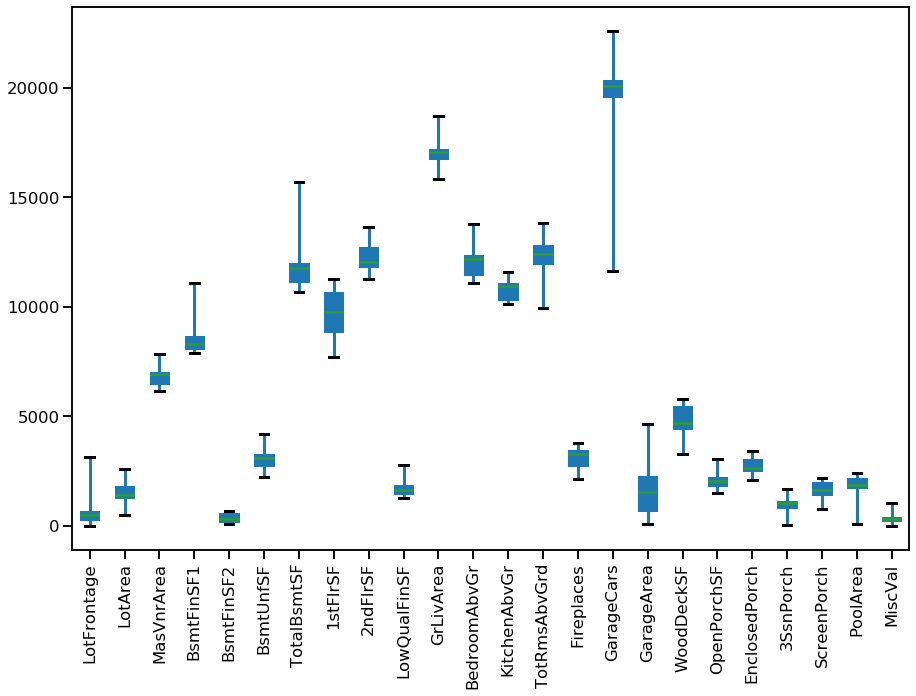

In [8]:
model_ridge = make_pipeline(StandardScaler(), SimpleImputer(), Ridge())

cv_result = cross_validate(model_ridge, data_numerical, target, cv=10, return_estimator=True)
cv_result

coefs = [estimator[-1].coef_ for estimator in cv_result["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

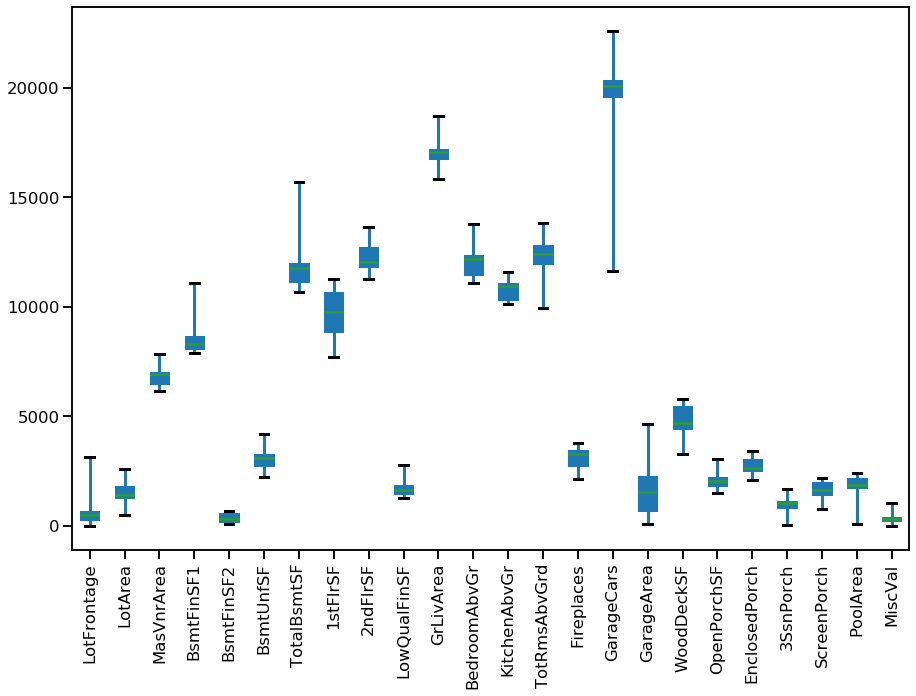

In [10]:
model_ridge = make_pipeline(StandardScaler(), SimpleImputer(), Ridge())

cv_result = cross_validate(model_ridge, data_numerical[numerical_features], target, cv=10, return_estimator=True)
cv_result

coefs = [estimator[-1].coef_ for estimator in cv_result["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

In [38]:
import numpy as np
alphas = np.logspace(-1, 3, num=30)
coef = []
for i in alphas:
    ridge_cv = make_pipeline( SimpleImputer(), RidgeCV(alphas=i))
    ridge_cv.fit(data_numerical, target)
    coef.append(np.max(ridge_cv["ridgecv"].coef_))



In [39]:
coef

[26299.935751984827,
 26294.289390363963,
 26286.536335257115,
 26275.89264203084,
 26261.284481226583,
 26241.24257029558,
 26213.759595483134,
 26176.098922587844,
 26124.54034475921,
 26054.04662125926,
 25957.834506869884,
 25826.838549666718,
 25649.069992092336,
 25408.90464788525,
 25086.39436788821,
 24656.800478984693,
 24090.702644703826,
 23355.225685476926,
 22417.07035021865,
 21247.948235056658,
 19832.4296625102,
 18176.923331591926,
 16316.807301745504,
 14317.736602990437,
 12268.359668102303,
 10265.396730442457,
 8396.151936667255,
 6724.860366330859,
 5286.795659702055,
 4090.004894736294]

# Census adult

In [79]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [88]:
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [102]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression


model_dummy = make_pipeline(StandardScaler(), DummyClassifier(strategy="most_frequent"))
cv_result = cross_validate(model_dummy, data, target, cv=10)
display(cv_result["test_score"].mean())


model_logist = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model_logist, data, target, cv=10, return_estimator=True)
display(cv_result["test_score"].mean())

0.7607182352166999

0.7998445658834604

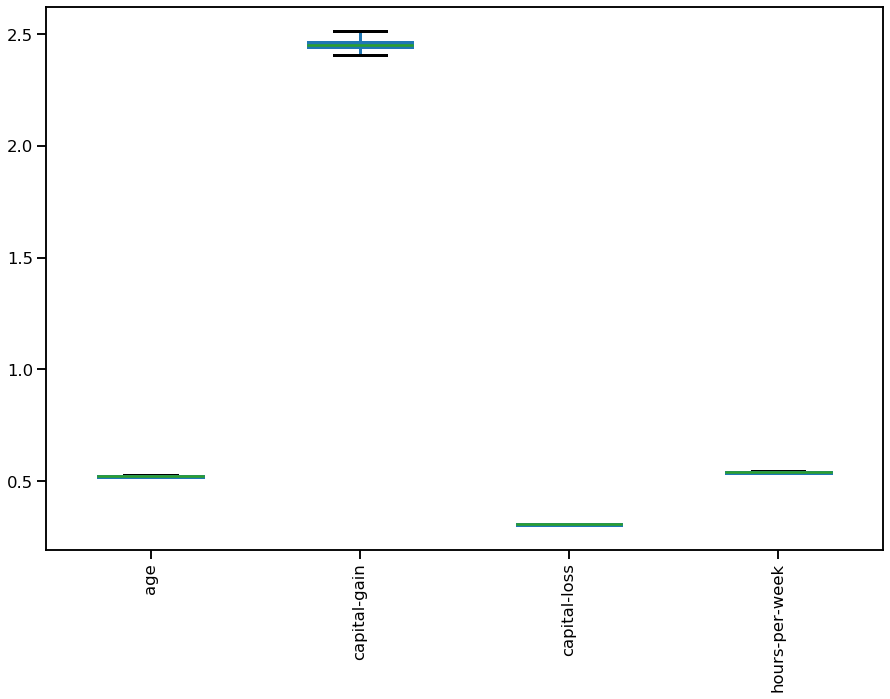

In [115]:
coefs = [estimator[-1].coef_[0] for estimator in cv_result["estimator"]]
coefs = pd.DataFrame(coefs, columns=data.columns)
_, ax = plt.subplots(figsize=(15, 10))
coefs.abs().plot.box(**boxplot_property, ax=ax)

# Census adult 2

In [40]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB
